   #                                                     House price predictions through ML

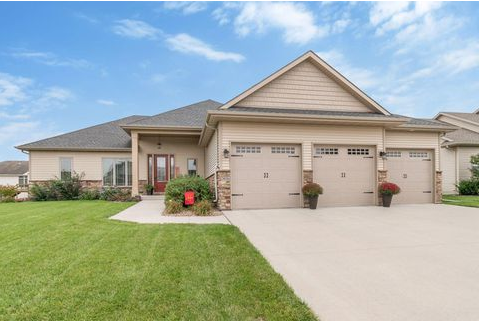

## Table of Content

1. [Introduction](#section1)
2. [Load and check data](#section2)
3. [Data exploration and pre-processing](#section3)<br>
    3.1 [Outliers](#section31)<br>
    3.1.1 [Outlier detection](#section311)<br>
    3.1.2 [Removal of the outliers](#section312)
    
    3.2 [Target Variable](#section32)<br>
    3.2.1 [Distribution](#section321)<br>
    3.2.2 [Target variable transformation](#section322)<br>    
    3.3 [Correlation check](#section33)<br>
    3.4 [Pair plot](#section34)<br>
    3.5 [Independent variable](#section35)<br/>
    

4. [Feature Engineering](#section4)<br>
    4.1 [Finding and imputing missing values](#section41)<br>
    4.2 [Transformation and encoding](#section42)<br>
      4.2.1 [Data Type and LableEncoder](#section421)<br>
      4.2.2 [Dummy variable](#section422)<br>
      4.2.3 [Creating dependent/predictor data frames and Train Test split](#section423)<br/>


5. [Modelling](#section5)<br/>
    5.1 [Model 1 - Linear regression (No GridSearchCV)](#section51)<br>
     5.1.1 [Instantiate Linear regression](#section511)<br>
     5.1.2 [Fit the linear model](#section512)<br>
     5.1.3 [Predict model for X_test and X_train](#section513)<br>
     5.1.4 [Calculate MAE/MSE/RMSE/R2-score/Adjusted R2-score](#section514)<br>

    5.2 [Model 2 - Linear regression (with GridSearch CV = True)](#section52)<br>
    5.3 [Model 3 - Random Forest](#section53)<br>
    5.4 [Model 4 - Decision Tree](#section54)<br>
    

6. [Conclusion](#section6)<br>



<a id=section1></a>
## 1. Introduction

The goal of this project is to predict the house sales prices from the given data. The first part consists of various visualization and normalization. By visualizing the distribution of features, we can gain some insight how to handle the data and determine the direction of the project. Also the distribution of target variable is transformed to normal by taking logarithm function so that they can fit many linear models better and lead better performance.

The second part is feature engineering. It comprises filling missing values, encoding and transformation of skewed features. Got some insights from web about this data so that will help you when to fill the missing values with zero instead of None or mode (the most frequent value). The next thing to do is encoding. Dataset must be transformed to appropriate format that a machine learning model can handle. By using LabelEncoder and get_dummies, we can convert them into a numerical representation that we can apply our machine learning algorithms to. Once we finish the encoding process, some highly skewed features need to be transformed to normal as the target variable was transformed.

Lastly, we will fit train data in different algorithm models and evaluate them based R-squared and adjusted R-sqaured values. Since is is regressor problem as dependent variable is continuous we will us relevant algorithms and evaluation methods.

<a id=section2></a>
## 2. Load and check data

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<a id=section3></a>
## 3. Data Exploration & Preprocessing

<a id=section31></a>
### 3.1 Outliers

<a id=section311></a>
#### 3.1.1 Outlier detection

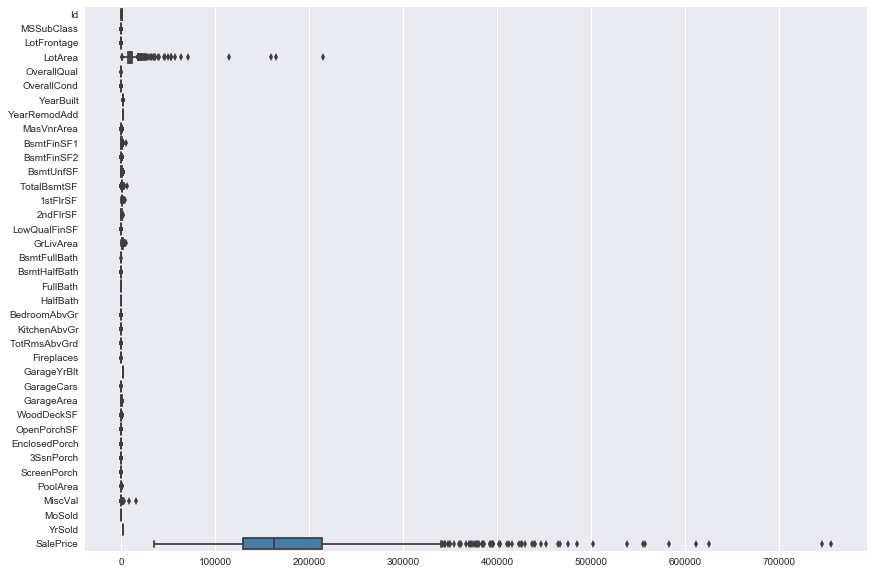

In [5]:
def lr(data):
    import seaborn as sns
    plt.figure(figsize=(14,10))
    ax= sns.boxplot(data=data, orient="h", palette="Set1")
    return ax 
lr(data)

<Figure size 432x288 with 0 Axes>

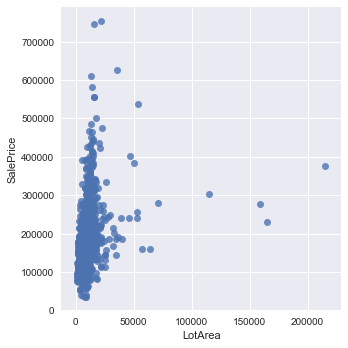

In [6]:
plt.figure()
otl = sns.lmplot('LotArea', 'SalePrice',data=data, fit_reg=False);

It can be seen that LoTArea has ouliers in the data compared to other variables so we will try to remove those

<a id=section312></a>
#### 3.1.2 Removal of the Outliers


<Figure size 432x288 with 0 Axes>

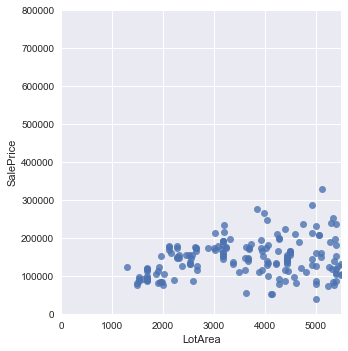

In [7]:
data.drop(data[(data['LotArea'] > 55000)].index, inplace = True)

plt.figure()
sns.lmplot('LotArea', 'SalePrice',data=data, fit_reg=False);
plt.xlim(0,5500);
plt.ylim(0,800000);


In [8]:
# Check the dimension

print(data.shape)

(1453, 81)


<a id=section32></a>
### 3.2 Target Variable

<a id=section321></a>
#### 3.2.1 Distribution

C:\Users\SUDHIR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


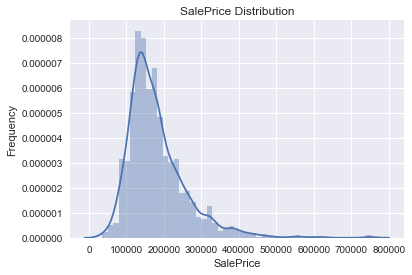

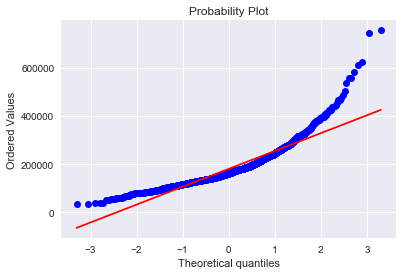

Skewness: 1.900


In [9]:
import scipy.stats as stats
sns.distplot(data['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()
qq = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

# For normally distributed data, the skewness should be about zero. 
# A skenewss  value greater than zero means that there is more weight in the left tail of the distribution

print("Skewness: {:.3f}".format(data['SalePrice'].skew()))

As it can seen from the distribution plot and qq plot, the target variable is skewed to the right. In order to use linear models we need to transform it to normal

<a id=section322></a>
#### 3.2.2 Target Variable Transformation

In [10]:
# log1p calculates log(1 + input)

data['SalePrice'] = np.log1p(data['SalePrice'])

C:\Users\SUDHIR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


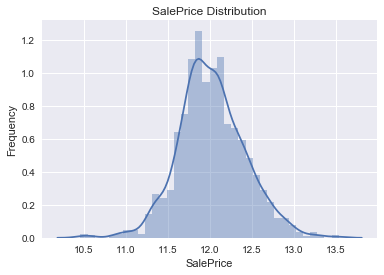

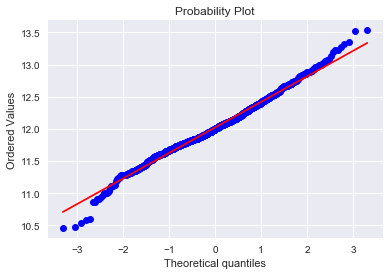

Skewness: 0.125


In [11]:
# let's check the result of the transformation

sns.distplot(data['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

print("Skewness: {:.3f}".format(data['SalePrice'].skew()))


By just taking log, the shape of the distribution becomes almost normal.

<a id=section33></a>
### 3.3 Correlation Check

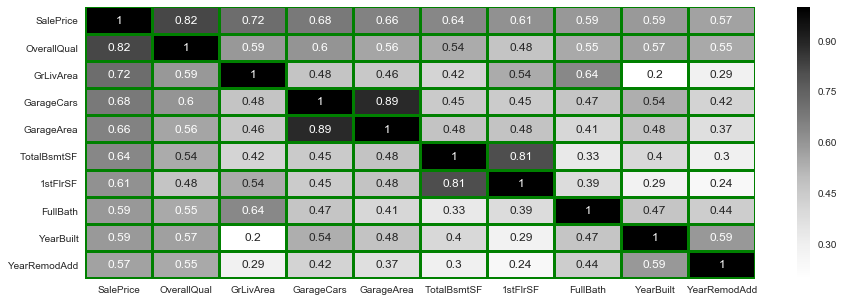

In [12]:
plt.figure(figsize=(15,5))

# Correlation table
corr_data = data.corr()

# select top 10 highly correlated variables with SalePrice
num = 10
col = corr_data.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(data[col].values.T)

# heatmap
heatmap = sns.heatmap(coeff, annot = True, xticklabels = col.values, yticklabels = col.values, linewidth=2,
                      cmap='Greys', linecolor='Green')


Based on the correlation table shown, we can conjecture that the features related with quality (OverallQual,FullBath, YearBuilt, YearRemodAdd) and the size (GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF) may play an important role in prediction.

<a id=section34></a>
### 3.4 Pairplot

One of the best way to visualize the relationship between the target variable and many features at the same time is pairplot. In our case, instead of plotting the whole features with target variable, only chose the top 10 most highly correlated features with target variable: 'SalesPrice','OverallQual',GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 1stFlrSF', 'FullBath','YearBuilt', 'YearRemodAdd'.

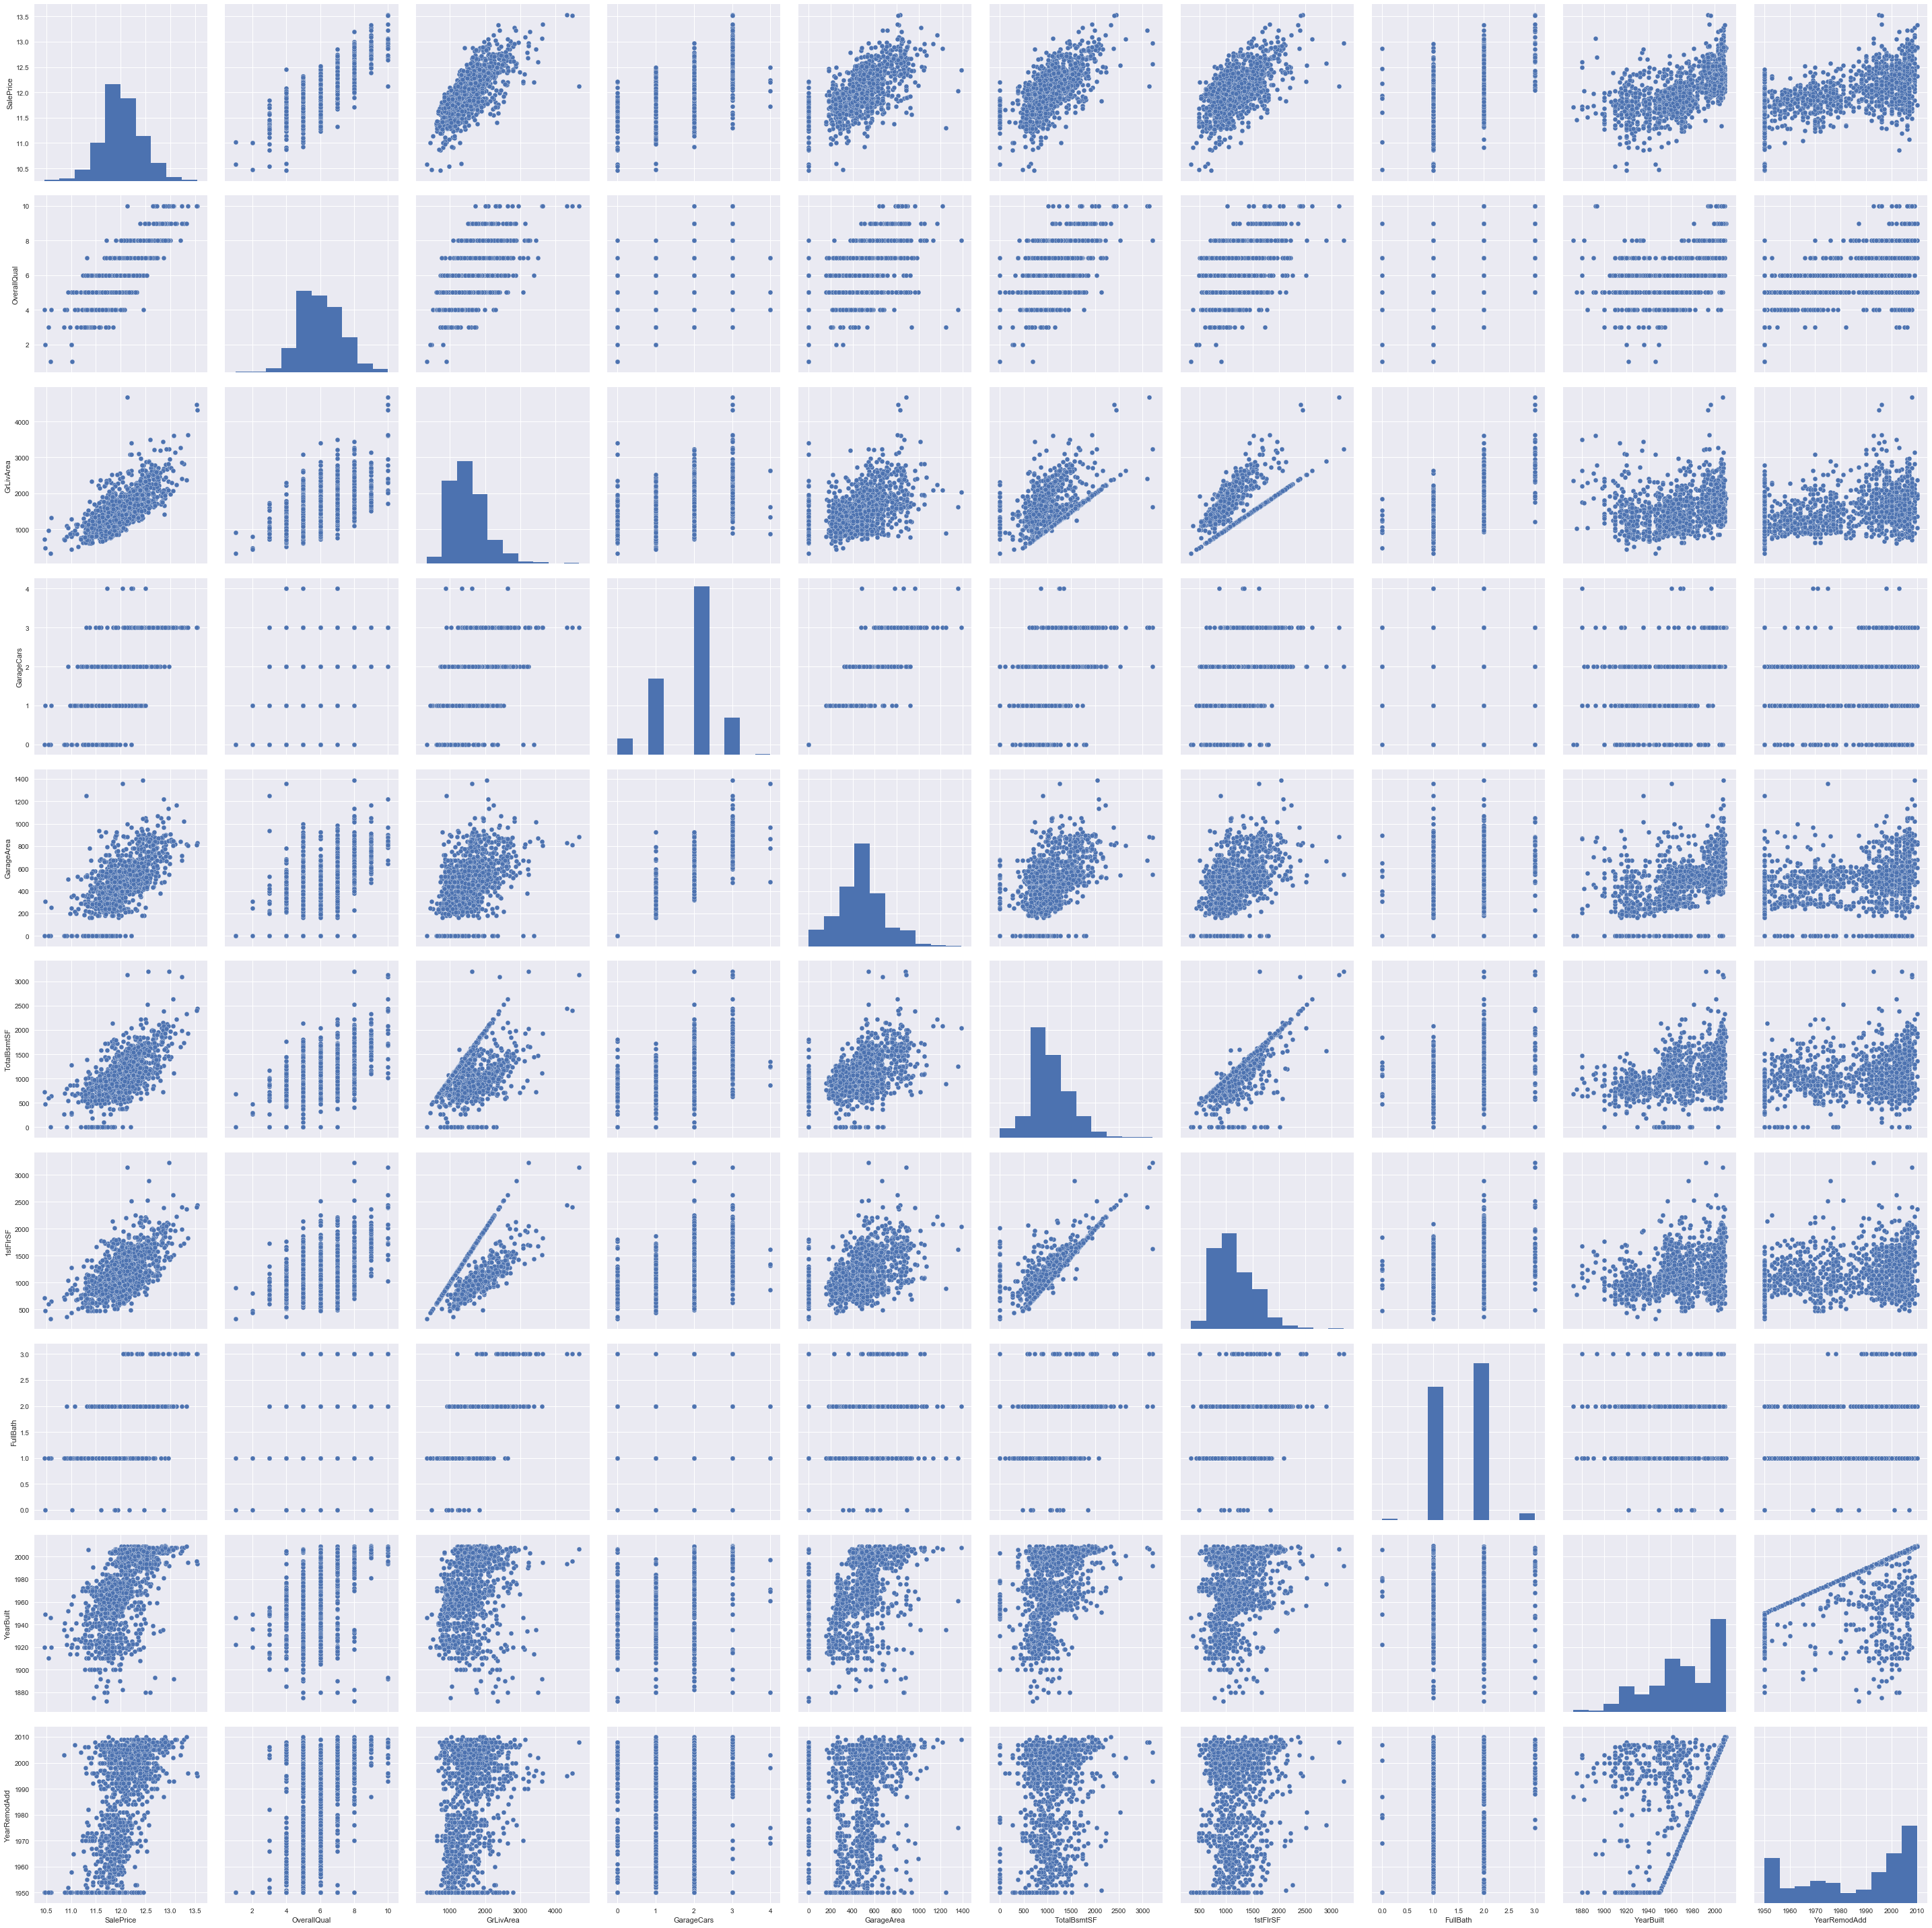

In [13]:
# Visualized the relationship between the target variable and top 10 features highly correlated with the target variable.

sns.pairplot(data[col], size=4);

As we can see the first column of the plots, it is not perfectly linear but we can say some of them are showing some positive linear pattern

<a id=section35></a>
### 3.5 Independent Variable removal

In [14]:
# seperate id from datasets and drop them.

data.drop('Id',axis=1,inplace = True)

<a id=section4></a>
## 4. Feature Engineering

<a id=section41></a>
### 4.1 Find missing values by count and percentage


Handling missing value is important as ML algorithm may not support missing values

In [15]:
missing_count = pd.DataFrame(data.isnull().sum(),columns=['Missing Count'])
missing_count = missing_count[missing_count['Missing Count']!=0]
missing_count['Missing %'] = (missing_count['Missing Count'] / data.shape[0]) * 100
missing_count.sort_values('Missing %',ascending=False)

,Missing Count,Missing %
PoolQC,1447,99.587061
MiscFeature,1401,96.421198
Alley,1362,93.737096
Fence,1172,80.660702
FireplaceQu,690,47.487956
LotFrontage,255,17.549897
GarageType,81,5.574673
GarageYrBlt,81,5.574673
GarageFinish,81,5.574673
GarageQual,81,5.574673


Imputing Missing Values OR dropping columns

We can drop columnns which are having missing values more than 80% as these columns may not add significant difference in model prediction

In [16]:
columns_nr = ['PoolQC', 'MiscFeature', 'Alley','Fence']
data.drop(columns_nr, axis =1, inplace = True)

For rest columns which are not having considerble missing values, we can impute these values by mode or median

In [17]:
nones = ['FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for i in nones:
    data[i].fillna('None',inplace = True)

Missing values in the above features (the elements in the list "nones") mean these properties do not have one of them: garage, basment, fireplace, alley access, pool, misc features, fence, or masonry veneer

#### Zero

In [18]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for i in zeros:
    data[i].fillna(0, inplace = True)

We will assume that these properties have zero basement or garage or masonry veneer.

#### Mode

There are only a few missing values in each feature. Therefore, we can fill missing values with most frequently occurred values

In [19]:
freq = ['MSZoning','Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual','Functional']

for i in freq:
    data[i].fillna(data[i].mode()[0], inplace=True)

#### Median

In [20]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data.LotFrontage.values


array([65., 80., 68., ..., 66., 68., 75.])

Check and confirm whether missing values are zero now

In [21]:
print("Remaining missing values:",data.isnull().sum().sum())

Remaining missing values: 0


<a id=section42></a>
## 4.2 Transformation & Encoding

<a id=section421></a>
### 4.2.1 Data Type & LabelEncoder

Ordinal

Ordinal values matter the order (e.g. a > b > c). In this case, instead of using get_dummies (0 or 1), we will use LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']

for i in ordinals:
    le = LabelEncoder()
    le.fit(data[i])
    data[i] = le.transform(data[i])

<a id=section422></a>
### 4.2.2 Dummy variable

Since we already converted ordinal types values to numeric by LabelEncoder, we do not have to worry about use of 'get_dummies' function

In [23]:
data = pd.get_dummies(data)
print(data.shape)

(1453, 212)


In [24]:
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,6,4,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,3,0,5,7,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0,0,6,4,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0,0,6,4,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,0,0,7,4,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


<a id=section423></a>
### 4.2.3  Creating dependent/predictor DataFrames and Train Test Split

In [25]:
from sklearn.cross_validation import train_test_split

X = data.loc[:,data.columns != 'SalePrice']
y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20)
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))


training shape:(1162, 211), test shape:(291, 211)


C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<a id=section5></a>
## 5. Modelling


In [26]:
# Import required libraries

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression


<a id=section51></a>
### 5.1 Model 1 - Linear regression (GridSearchCV - False)

<a id=section511></a>
### 5.1.1 Instantiate Linear regression model using scikit-learn

In [27]:
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

<a id=section512></a>
### 5.1.2 Fit the linear model on X_train and y_train

In [28]:
linreg.fit(X_train, y_train)     # model fit with random_state

linreg.fit(X_train1, y_train1)   # model fit without random_state

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print('Intercept:', linreg.intercept_)


Intercept: 12.728906705834818


<a id=section513></a>
### 5.1.3 Predict the model for X_test and X_train

In [30]:
y_pred_test = linreg.predict(X_test)   #with random_state
y_pred_train = linreg.predict(X_train) #with random_state

y_pred_test1 = linreg.predict(X_test1)  #without random_state
y_pred_train1 = linreg.predict(X_train1) #without random_state

#### Evaluations

Mean absolute error

In [31]:
from sklearn import metrics
def lr():     
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train) # Calculate MAE for train
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)    # Calculate MAE for test 
    print('MAE for training set is {}'.format(MAE_train))          # print MAE for train
    print('MAE for test set is {}'.format(MAE_test))               # print MAE for test      
lr()

MAE for training set is 0.07076112383355808
MAE for test set is 0.07613798285564506


Mean Squared error

In [32]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train) # Calculate MSE for train
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)    # Calculate MSE for test
    print('MSE for training set is {}'.format(MSE_train))         # print MSE for train
    print('MSE for test set is {}'.format(MSE_test))              # print MSE for test
lr()

MSE for training set is 0.010054635455744788
MSE for test set is 0.011967530588376121


Root mean squared error 

In [33]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train)) # Calculate RMSE for train
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))     # Calculate RMSE for test 
    print('RMSE for training set is {}'.format(RMSE_train))                  # print RMSE for train
    print('RMSE for test set is {}'.format(RMSE_test))                       # print RMSE for test
lr()

RMSE for training set is 0.10027280516543251
RMSE for test set is 0.10939620920478059


R2_score

In [34]:
from sklearn.metrics import r2_score
def lr():
    r2= r2_score(y_train, y_pred_train) # Calculate r2 for train
    r2_= r2_score(y_test, y_pred_test)  # Calculate r2 for test 
    print(r2)                           # print r2 for train
    print(r2_)                          # print r2 for test
lr()

0.9378405024737995
0.9193695856838664


R-squared and adjusted R-squared together 

In [35]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_train is:', r_squared, adjusted_r_squared)

R-squared and adjusetd R-squared value for X_train is: 0.9378405024737994 0.92403455091798


In [36]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R-squared and adjusetd R-squared value for X_test is: 0.9193695856838664 0.7040149347888767


Range of R-squared value is [0,1] and higher is better and hence this model can be said to be better as more variance will be explained by model. However R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.
There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting).
In our case, R2 score is less for test dataset comapred to train data set.

Calculate R-squared and adjusetd R-squared values for linear regresion parameter random_state is not used

In [37]:
yhat = linreg.predict(X_test1)
SS_Residual = sum((y_test1-yhat)**2)
SS_Total = sum((y_test1-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R-squared and adjusetd R-squared value for X_test is: 0.9276791428819288 0.7345183726045486


R-squared > 0.905

Adjusted R-squared > 0.654

<a id=section52></a>
### 5.2 Model 2 - Linear regression (GridSearchCV = True)


In [38]:
from sklearn.model_selection import GridSearchCV
def linear_reg( X, y):
    parameters = {'normalize':[True,False], 'copy_X':[True, False]}
    linreg_gs = GridSearchCV(linreg,parameters, cv = 10)
    linreg_gs.fit(X_train, y_train)                                                     # fit the model to the training data (learn the coefficients)
    print("Mean cross-validated score of the best_estimator: ", linreg_gs.best_score_)  
    y_pred_test = linreg_gs.predict(X_test)                                             # make predictions on the testing set
    RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                       # compute the RMSE of our predictions
    print('RMSE for the test set is {}'.format(RMSE_test))
    return linreg_gs
linreg_gs = linear_reg(X, y )


Mean cross-validated score of the best_estimator:  0.8743442821077875
RMSE for the test set is 0.01737298173479836


Calculate R-squared and adjusetd R-squared values for linear regresion with GridSearchCV

In [39]:
yhat = linreg_gs.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R-squared and adjusetd R-squared value for X_test is: 0.8829507303249361 0.5703254657497654


R-squared > 0.88

Adjusted R-squared > 0.570

R-squared and adjusetd R-squared values for models with and without GridSearchCV is almost coming same for test data

<a id=section53></a>
### 5.3 Model 3 - Random Forest

#### GridSearchCV

Instantiating Random Forest Classifier using scikit learn with default parameters.

In [40]:
RFC = RandomForestRegressor(random_state = 1)

rf_param_grid = {"max_depth": [None],
              "max_features": [200],
              "min_samples_leaf": [1],
              "n_estimators" :[270]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv = 20, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)



Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


{'max_depth': None, 'max_features': 200, 'min_samples_leaf': 1, 'n_estimators': 270}


Fitting the model on X_train and y_train

In [41]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(RFC, X_test, y_test, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

print("Random Forest mean score:", rmsle_cv(RFC_best).mean())
print("Random Forest std:", rmsle_cv(RFC_best).std())

Random Forest mean score: 0.16783676457245816
Random Forest std: 0.053910996557806755


Evaluating R-squared and adjusted R-squared value for Random Forest model

In [42]:
yhat = RFC_best.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R-squared and adjusetd R-squared value for X_test is: 0.8611624169729792 0.4903430496476453


R-squared > 0.86

Adjusted R-squared > 0.490

#### RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if we are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [43]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

random_cv = RandomizedSearchCV(RFC,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=10,
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)



In [44]:
random_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.1s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': [100], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=5)

In [45]:
yhat = random_cv.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R-squared and adjusetd R-squared value for X_test is: 0.8542151730388097 0.4648405086234786



R-squared > 0.85

Adjusted R-squared > 0.464

<a id=section54></a>
### 5.4 Model 4 - Decision Tree model

In [46]:
from sklearn import tree
model = tree.usin(random_state = 1)
model.fit(X_train, y_train)

AttributeError: module 'sklearn.tree' has no attribute 'usin'

In [ ]:
yhat = model.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R-squared > 0.69

Adjusted R-squared > -.0776

With some change in hyeperparameter value

In [ ]:
model1 = tree.DecisionTreeRegressor(random_state = 1, max_features=10)
model1.fit(X_train, y_train)


In [ ]:
yhat = model1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R-squared and adjusetd R-squared value for X_test is:',r_squared, adjusted_r_squared)

R2 score value seen to have decreased as max_feature count is set as 10

<a id=section6></a>
## 6. Conclusion

Scores of all models can be summarised as below


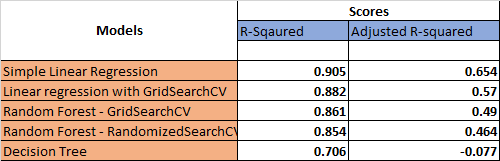

1) I observed that When independent variable are too many, it is comparatively difficult to find their correlarion with dependent variable and modelling becomes quite complex. This data set has huge number of varibles so sorting them out took quite good time<br>
2) Scaling and dummification helped to get desired data set for models<br>
3) Different algorithms are giving different results<br>
4) Accuracy of the model found to ve varying with hyperparamter tuning as R2-score keeps on changing as parameter values changed e.g. as we increase or decrease max_feature value, R2 -score goes on increasing or decreasing respectively <br>
5) With change parameters values such CV, min_samples_leaf, max_depth scoring of the model has significant effect<br>
6) GridSearchCV and RandomSearchCV improved the accuray however computational time is affected for sure<br>
7) I could observe that prediction accuracy for the models increased from simple linear regression => decision tree => random forest and CV 

This is just a small experiment and it needs more attempts of experiments to fine tune the models !!

